In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
#pip install folium

In [3]:
#read csv
birm_unemployment_df=pd.read_csv('../data/Birmingham_Data/Unemployment Rate_Birmingham-Hoover.csv')
birm_crime_north_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_south_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_west_df=pd.read_excel('../data/Birmingham_Data/open-data-west-2023.xlsx')
birm_crime_east_df=pd.read_excel('../data/Birmingham_Data/opendataportal-east-2023.xlsx')  

In [5]:
birm_crime_east_df.head(1)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute,Case Offense Statute Description,Case ORI,Reporting District
0,700,SPRINGVILLE RD,33.608202,-86.686890,35215.0,11/30/2023 18:00:00,13A-8-3,Theft of Property Auto Theft 1st,AL0010200,E230
1,8300,DIVISION AVE,33.571259,-86.720541,35206.0,11/30/2023 15:00:00,13A-8-5,Theft from Residence 4th Degree,AL0010200,E223
2,7700,RUGBY AVE,33.557691,-86.718364,35206.0,11/30/2023 14:00:00,13A-8-3,Theft of Property Auto Theft 1st,AL0010200,E224
3,500,61ST ST S,33.538302,-86.742352,35212.0,11/30/2023 12:00:00,13A-6-138,Domestic Strangulation or Suffocation,AL0010200,E234


In [6]:
birm_crime_north_df.head(1)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131


In [67]:
birm_crime_south_df.tail(1)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
1057,2000.0,12TH AVE N,33.527089,-86.814095,35234.0,01/01/2023,Rape - Force,N128


In [9]:
birm_crime_west_df.head(1)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Disch Firearm into Occupied Bldg/Veh,W429


In [19]:
birm_unemployment_df.head(1)

,Series ID,Period
0,LAUMT011382000000003,M01


In [53]:
birm_crime_df = pd.concat([birm_crime_north_df, birm_crime_south_df, birm_crime_east_df, birm_crime_west_df], ignore_index=True)
birm_crime_df.head() #6269 rows × 10 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131,NaN,NaN
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120,NaN,NaN


In [54]:
#top ten crime in birmingham
top_ten_crime_in_birm=birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_crime_in_birm.head(10)

Case Offense Statute Description
Theft of Property Auto Theft 1st             1323
Disch Firearm into Occupied Bldg/Veh          502
Burglary (Residence) Force 3rd Degree         458
Miscellaneous Theft-3rd Degree                404
Theft - TOP 2nd Degree                        362
Larceny/Theft-Shoplifting, less than $500     272
Burglary-Residence-No Force-3rd Degree        215
Theft-Firearms-2nd Degree                     175
Domestic Strangulation or Suffocation         167
Larceny/Theft-TOP 2 $500-less than $1500      152
Name: count, dtype: int64

<Axes: title={'center': 'Top Ten Crime in Birmingham, AL'}, ylabel='Case Offense Statute Description'>

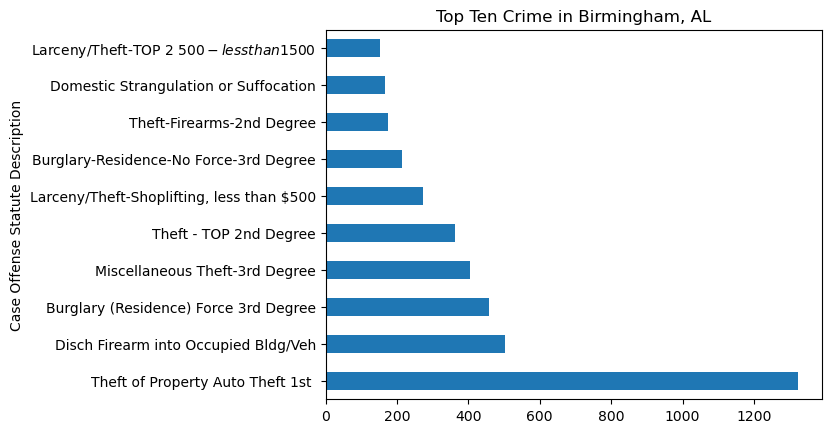

In [55]:
top_ten_crime_in_birm.head(10).plot(kind="barh", title = "Top Ten Crime in Birmingham, AL")

In [56]:
birm_crime_df.head(2)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN


In [57]:
import calendar


In [58]:
#convert to datetime specifying format
birm_crime_df['Case Occurred From Date'] = pd.to_datetime(birm_crime_df['Case Occurred From Date'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN


In [44]:
birm_crime_df['Case Offense Statute Description'].unique()

array(['Theft-From Public Building-1st Degree',
       'Larceny/Theft-Shoplifting, less than $500',
       'Theft of Property Auto Theft 1st ', 'Theft by deception',
       'Theft from Residence 4th Degree',
       'Miscellaneous Theft-3rd Degree', 'Theft - TOP 2nd Degree',
       'Larceny/Theft-TOP 2 $500-less than $1500',
       'Burglary-Residence-No Force-3rd Degree',
       'Domestic Burglary - 3rd Degree',
       'Burglary (Residence)-Force 1st Degree',
       'Burglary (Residence) Force 3rd Degree',
       'Domestic Strangulation or Suffocation',
       'Aggravated Assault Family-Knife-2nd Degree',
       'Disch Firearm into Occupied Bldg/Veh',
       'Robbery-Business-Gun-1st Degree', 'Theft-Firearms-2nd Degree',
       'Theft from Residence - 3rd Degree',
       'Aggravated Assault Family-Other Weapon-2nd Degree',
       'Theft-Vehicle Parts-4th Degree', 'Theft-From Yards-3rd Degree',
       'Aggravated Assault Non-Family-Knife-2nd Degree',
       'Theft-From Yards-4th Degree'

In [47]:
# Extracting the month number and creating 'Month Occured' column
birm_crime_df['Month Occured'] = birm_crime_df['Case Occurred From Date'].dt.month
birm_crime_df['Month Occured'].head()

0    11.0
1    11.0
2     NaN
3    11.0
4    11.0
Name: Month Occured, dtype: float64

In [ ]:
#Count number of arrests for each precinct in pre covid period
# pre_data = pre_data.groupby('Precinct')['ARREST_DATE'].count()

# pre_data = pd.DataFrame(pre_data) #turn back into dataframe
# pre_data.reset_index(inplace=True) #reset index
# pre_data.rename(columns={'ARREST_DATE':'Number of Arrests'}, inplace = True)

# #view dataframe
# pre_data.head()

In [66]:
birm_crime_df.tail(3)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
6266,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211.0,2023-01-01 02:25:00,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN
6267,1300.0,JERSEY ST,33.498782,-86.924066,35224.0,2023-01-01 00:10:00,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN
6268,1600.0,BOISE AVE,33.482842,-86.856379,35211.0,2023-01-01 00:01:00,Disch Firearm into Occupied Bldg/Veh,W424,NaN,NaN


In [85]:
birm_crime_df['Case Address Zip'].dtype

dtype('float64')

In [89]:
#cleaning zipcode column
birm_crime_df = birm_crime_df.dropna(subset=['Case Address Zip'])
birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].astype(int)

In [92]:
birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].fillna(0).astype(int)
birm_crime_df['Case Address Zip']

0       35203
1       35207
2       35203
3       35207
5       35203
        ...  
6264    35211
6265    35211
6266    35211
6267    35224
6268    35211
Name: Case Address Zip, Length: 6055, dtype: int64

In [94]:
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN


In [95]:
num_offense_per_zip=birm_crime_df.groupby('Case Address Zip')['Case Offense Statute Description'].value_counts()
num_offense_per_zip

Case Address Zip  Case Offense Statute Description                 
35020             Theft of Property Auto Theft 1st                     11
                  Disch Firearm into Occupied Bldg/Veh                  4
                  Larceny/Theft-TOP 2 $500-less than $1500              2
                  Burglary-Residence-No Force-3rd Degree                2
                  Burglary (Residence) Force 3rd Degree                 2
                                                                       ..
35235             Robbery-Business-Gun-3rd Degree                       1
35242             Aggravated Assault Family-Other Weapon-2nd Degree     1
35294             Aggravated Assault Family-Gun-1st Degree              1
                  Aggravated Assault Non-Family-Gun-2nd Degree          1
                  Sodomy-With A Woman-Other Weapon-2nd Degree           1
Name: count, Length: 948, dtype: int64

In [96]:
total_offenses_per_zip = birm_crime_df.groupby('Case Address Zip')['Case Offense Statute Description'].count().sort_values(ascending=False).head(15)
total_offenses_per_zip.head

<bound method NDFrame.head of Case Address Zip
35204    780
35206    640
35211    609
35203    591
35208    556
35215    484
35207    420
35212    331
35234    269
35218    254
35214    218
35210    202
35217    147
35235    136
35228     87
Name: Case Offense Statute Description, dtype: int64>

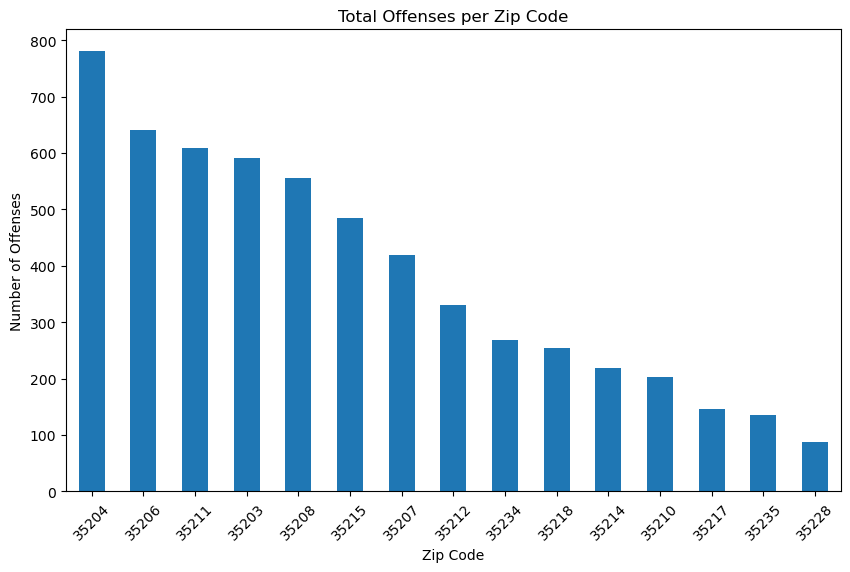

In [97]:
total_offenses_per_zip.plot(kind='bar', figsize=(10, 6))
plt.title('Total Offenses per Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.show()

In [98]:
num_offense_per_zip_df = num_offense_per_zip.reset_index(name='Counts').head(20)
num_offense_per_zip_df

,Case Address Zip,Case Offense Statute Description,Counts
0,35020,Theft of Property Auto Theft 1st,11
1,35020,Disch Firearm into Occupied Bldg/Veh,4
2,35020,Larceny/Theft-TOP 2 $500-less than $1500,2
3,35020,Burglary-Residence-No Force-3rd Degree,2
4,35020,Burglary (Residence) Force 3rd Degree,2
5,35020,Aggravated Assault Family-Gun-1st Degree,1
6,35020,Theft from Residence 4th Degree,1
7,35020,Theft - TOP 2nd Degree,1
8,35020,Miscellaneous Theft-2nd Degree,1
9,35020,Burglary (Residence) Force 2nd Degree,1


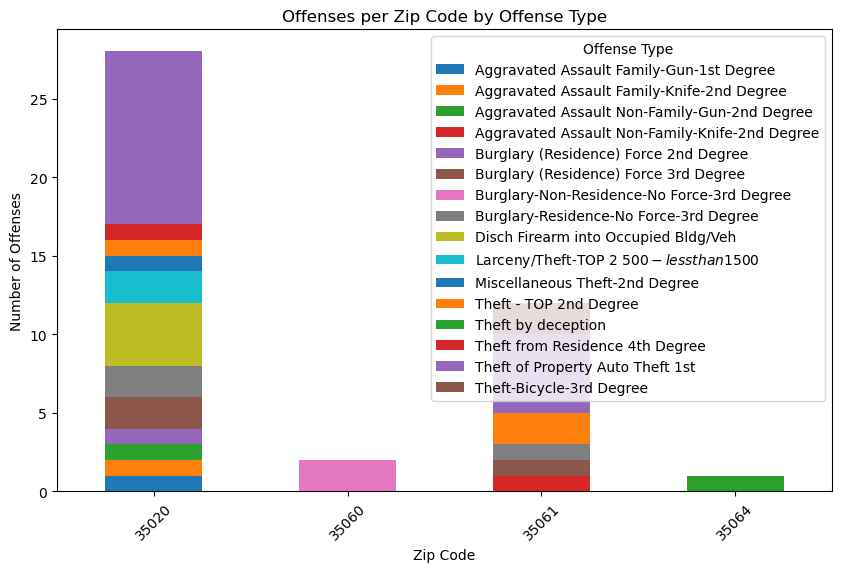

In [99]:
#Offenses per Zip Code 
num_offense_per_zip_df.pivot(index='Case Address Zip', columns='Case Offense Statute Description', values='Counts').plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Offenses per Zip Code by Offense Type')
plt.xlabel('Zip Code')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.legend(title='Offense Type')
plt.show()

<Axes: title={'center': 'Top 15 Crime in Birmingham'}, ylabel='Case Offense Statute Description'>

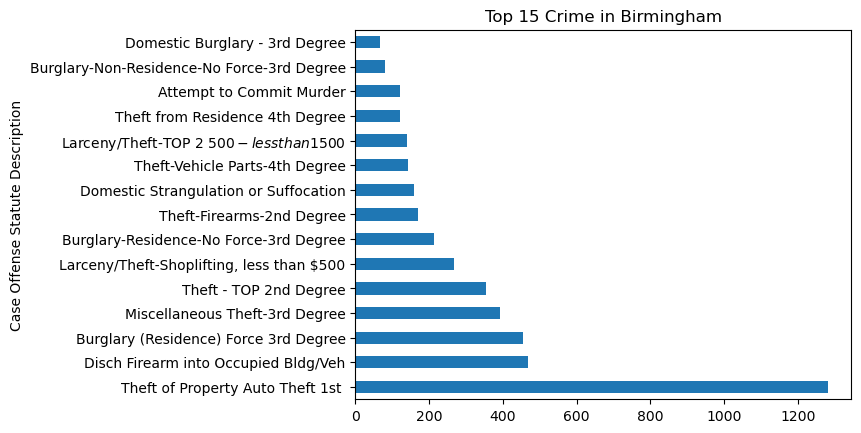

In [103]:
top_15_crimes_in_birm = birm_crime_df['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)
top_15_crimes_in_birm.plot(kind="barh", title = "Top 15 Crime in Birmingham")